<a href="https://colab.research.google.com/github/LCaravaggio/politext/blob/main/Nuevas_Ideas_Politext.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import ast

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Se lee la base original
base=pd.read_csv('/content/drive/MyDrive/par_esp_interventions.csv')

In [4]:
# Se conservan solamente las intervenciones de los partidos PSOE y PP
base=base[(base['party'] == 'PSOE') | (base['party'] == 'PP')]

Preprocesamiento

In [5]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords=stopwords.words('spanish')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import string
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [7]:
base['role'].unique()

array(['SECRETARIA DE LA MESA DE EDAD', 'PRESIDENTE DE LA MESA DE EDAD',
       'PRESIDENTE DEL CONGRESO DE LOS DIPUTADOS',
       'PRESIDENTE, PRESIDENTA', 'DIPUTADO, DIPUTADA', 'SECRETARIO',
       'CANDIDATO A LA PRESIDENCIA DEL GOBIERNO',
       'VICEPRESIDENTE SEGUNDO DEL GOBIERNO Y MINISTRO DE ECONOMÍA Y HACIENDA',
       'PRESIDENTE DEL GOBIERNO', 'MINISTRO DE JUSTICIA',
       'MINISTRA DE FOMENTO', 'MINISTRO DE SANIDAD Y CONSUMO',
       'MINISTRA DE ADMINISTRACIONES PÚBLICAS',
       'MINISTRO DE TRABAJO E INMIGRACIÓN',
       'MINISTRO DE ASUNTOS EXTERIORES Y DE COOPERACIÓN',
       'MINISTRA DE IGUALDAD', 'MINISTRA DE VIVIENDA',
       'MINISTRA DE CIENCIA E INNOVACIÓN', 'MINISTRO DEL INTERIOR',
       'VICEPRESIDENTA', 'REPRESENTANTE DEL PARLAMENTO DE ANDALUCÍA',
       'REPRESENTANTE DE LAS CORTES DE CASTILLA-LA MANCHA',
       'VICEPRESIDENTA SEGUNDA DEL GOBIERNO Y MINISTRA DE ECONOMÍA Y HACIENDA',
       'VICEPRESIDENTE TERCERO DEL GOBIERNO Y MINISTRO DE POLÍTICA TERRIT

In [8]:
# Elimino de la base las intervenciones del Presidente de la cámara
base=base[(base['role'] != 'PRESIDENTE, PRESIDENTA') | (base['role'] != 'PRESIDENTE DEL CONGRESO DE LOS DIPUTADOS')]

In [9]:
# Se incorporan las stopwords sugeridas por Federico
stopwords.extend(['señor', 'señora', 'mucha', 'gracia', 'año', 'pasado', 'cada', 'vez', 'uno', 'dos', 'tres', 'cuatro', 'cinco', 'seis' ,'siete', 'ocho', 'nueve', 'diez'])
stopwords.extend(['hoy', 'aquí', 'primer', 'lugar', 'primera', 'segunda', 'primero', 'segundo', 'siguiente', 'tercer'])
stopwords.extend(['convergencia', 'esquerra', 'republicana', 'grupo', 'parlamentaria', 'parlamentario', 'partido'])
stopwords.extend(['enmienda', 'votación', 'favor', 'abstención', 'ley', 'real', 'decreto', 'decretoley', 'resultado', 'voto', 'sé' ,'sí', 'silencio' ,'favor'])
stopwords.extend(['usted', 'señoría', 'presidente', 'presidenta', 'ministro', 'orden' , 'día', 'palabra', 'petición', 'posición', 'punto', 'vista', 'sesión', 'baldoví', 'duran', 'turno'])
stopwords.extend(['hacer', 'frente', 'puede' ,'ser', 'va', 'voy', 'decir'])
stopwords.extend(['millón', 'euro', 'emitido', 'efectuada', 'dio', 'comienzo', 'partido', 'queda', 'quedan', 'rechazada', 'aceptada', 'comienza', 'usted', 'sabe', 'abstención', 'diputado', 'gobierno'])

In [10]:
base['tokens']=""

In [11]:
# Esta celda tarda unos 5 minutos en correr
for ind in base.index:
    #elimino puntuación
    non_punctuation = base['intervention'][ind].translate(str.maketrans('', '', string.punctuation))
    word_tokens = word_tokenize(non_punctuation)

    #elimino stopwords
    tokens=[w for w in word_tokens if not w.lower() in stopwords]

    #stemming
    porter_stemmer = PorterStemmer()
    stemmers = [porter_stemmer.stem(word) for word in tokens]
    base['tokens'][ind] = [stem for stem in stemmers if stem.isalpha() and len(stem) > 1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


# TFIDF

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [13]:
tfidf=TfidfVectorizer(ngram_range=[2,2], max_features=200, stop_words=stopwords, max_df=0.95, min_df=0.001)

In [14]:
base['tokens']=base["tokens"].map(' '.join)

In [15]:
vecs = tfidf.fit_transform(base['tokens'])
feature_names = tfidf.get_feature_names()
dense = vecs.todense()
lst1 = dense.tolist()
df = pd.DataFrame(lst1, columns=feature_names)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [16]:
df.shape

(73707, 200)

In [17]:
df.head()

,activa empleo,actividad económica,acuerd celebración,administracion pública,administración gener,administración justicia,agencia tributaria,ahora mismo,alimentación medio,alta velocidad,...,tribun supremo,unidainiciativa per,unido podemosen,unión europea,unión progreso,vamo seguir,vamo votar,vasco pnv,ver si,violencia género
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# PP

In [18]:
pp=base[base['party'] == 'PP']

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

In [20]:
cv=CountVectorizer(ngram_range=[2,2], max_features=200, stop_words=stopwords, max_df=0.95, min_df=0.001)

In [21]:
vec = cv.fit(pp['tokens']) 

In [22]:
bag_of_words = vec.transform(pp['tokens'])

In [23]:
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)

In [24]:
print(words_freq[:-40])

[('comunidad autónoma', 5472), ('unión europea', 2618), ('administracion pública', 1897), ('izquierda plural', 1845), ('seguridad social', 1744), ('servicio público', 1360), ('servicio social', 1351), ('pregunta dirigida', 1347), ('creación empleo', 1303), ('presupuesto general', 1301), ('déficit público', 1292), ('crisi económica', 1280), ('economía española', 1067), ('unión progreso', 1033), ('progreso democracia', 1033), ('crecimiento económico', 1026), ('unido podemosen', 1001), ('podemen marea', 1000), ('confeder unido', 995), ('podemosen comú', 993), ('comú podemen', 992), ('telemático telemático', 957), ('fijación posicion', 943), ('convergència unió', 928), ('medio ambient', 891), ('puesto trabajo', 877), ('violencia género', 839), ('vasco pnv', 839), ('social igualdad', 838), ('política económica', 811), ('sociedad española', 801), ('recuperación económica', 779), ('vamo votar', 763), ('tribun constitucion', 728), ('toma consideración', 719), ('extraordinaria comisión', 716), 

In [25]:
tuples = [tuple(x) for x in words_freq]

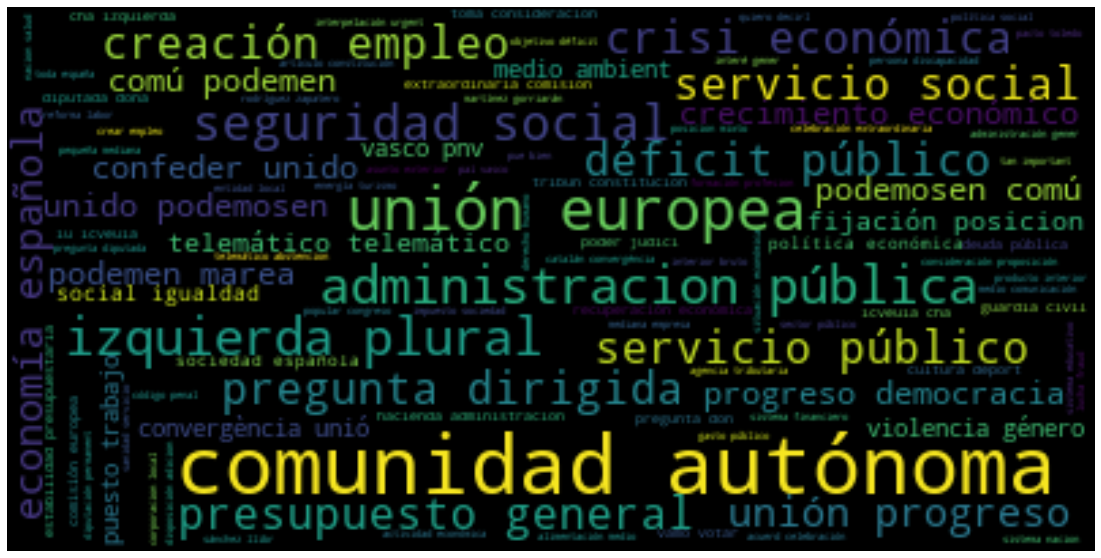

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud().generate_from_frequencies(dict(tuples))
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [27]:
names=['bigrama', 'frecuencia']
df = pd.DataFrame(words_freq, columns=names)

In [28]:
df['sobre_bigramas']=df['frecuencia']/len(words_freq)

In [29]:
df['en_discursos']=[sum([row[i] for row in bag_of_words.toarray()]) for i in range(0,len(bag_of_words.toarray()[0]))]

In [30]:
df

,bigrama,frecuencia,sobre_bigramas,en_discursos
0,comunidad autónoma,5472,27.360,503
1,unión europea,2618,13.090,532
2,administracion pública,1897,9.485,1897
3,izquierda plural,1845,9.225,520
4,seguridad social,1744,8.720,260
...,...,...,...,...
195,administración justicia,260,1.300,763
196,millon parado,260,1.300,839
197,vamo seguir,258,1.290,272
198,seguir trabajando,258,1.290,839


# PSOE

In [31]:
psoe=base[base['party'] == 'PSOE']

In [32]:
cv=CountVectorizer(ngram_range=[2,2], max_features=200, stop_words=stopwords, max_df=0.95, min_df=0.001)

In [33]:
vec = cv.fit(psoe['tokens']) 

In [34]:
bag_of_words = vec.transform(psoe['tokens'])

In [35]:
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)

In [36]:
print(words_freq[:-40])

[('comunidad autónoma', 4822), ('unión europea', 3171), ('seguridad social', 1507), ('reforma labor', 1071), ('servicio público', 1013), ('política social', 1003), ('sistema financiero', 973), ('crisi económica', 915), ('presupuesto general', 878), ('economía española', 861), ('tribun constitucion', 841), ('violencia género', 769), ('política económica', 740), ('per catalunya', 720), ('unidainiciativa per', 714), ('catalunya verd', 706), ('comisión europea', 704), ('republicanaizquierda unidainiciativa', 691), ('deuda pública', 666), ('administracion pública', 639), ('amnistía fiscal', 603), ('poder judici', 579), ('política fiscal', 553), ('consejo europeo', 549), ('guardia civil', 545), ('puesto trabajo', 529), ('gasto público', 523), ('sociedad española', 521), ('política activa', 509), ('crecimiento económico', 508), ('cambio climático', 500), ('nacion unida', 494), ('entidad financiera', 481), ('derecho humano', 480), ('toma consideración', 475), ('medio ambient', 468), ('déficit 

In [37]:
tuples = [tuple(x) for x in words_freq]

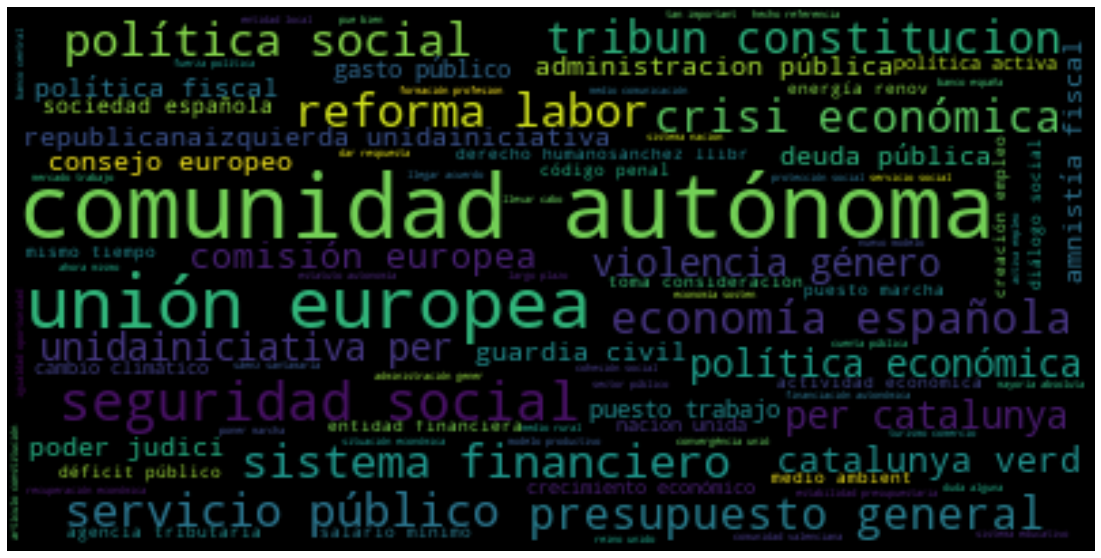

In [38]:
wordcloud = WordCloud().generate_from_frequencies(dict(tuples))
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [39]:
names=['bigrama', 'frecuencia']
df = pd.DataFrame(words_freq, columns=names)

In [40]:
df['sobre_bigramas']=df['frecuencia']/len(words_freq)

In [41]:
df['en_discursos']=[sum([row[i] for row in bag_of_words.toarray()]) for i in range(0,len(bag_of_words.toarray()[0]))]

In [42]:
df

,bigrama,frecuencia,sobre_bigramas,en_discursos
0,comunidad autónoma,4822,24.110,342
1,unión europea,3171,15.855,439
2,seguridad social,1507,7.535,639
3,reforma labor,1071,5.355,417
4,servicio público,1013,5.065,221
...,...,...,...,...
195,exposición motivo,214,1.070,261
196,prima riesgo,214,1.070,225
197,medida urgent,212,1.060,272
198,sector privado,211,1.055,769


# LASSO

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(base.loc[:, base.columns != 'party'], base['party'], test_size=0.33, random_state=42)

In [44]:
# Balance de clase
y_train.value_counts()

PP      31148
PSOE    18235
Name: party, dtype: int64

In [45]:
cv=CountVectorizer(ngram_range=[2,2], max_features=200, stop_words=stopwords, max_df=0.95, min_df=0.001)
vec = cv.fit(X_train['tokens']) 

In [46]:
train_matrix = vec.fit_transform(X_train['tokens'])
test_matrix = vec.transform(X_test['tokens'])

In [47]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l1', max_iter=1000, solver='liblinear')

In [48]:
lr.fit(train_matrix,y_train)

LogisticRegression(max_iter=1000, penalty='l1', solver='liblinear')

In [49]:
predictions = lr.predict(test_matrix)

In [50]:
from sklearn.metrics import confusion_matrix,classification_report
new = np.asarray(y_test)
confusion_matrix(predictions,y_test)

array([[14803,  7545],
       [  547,  1429]])

In [51]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

          PP       0.96      0.66      0.79     22348
        PSOE       0.16      0.72      0.26      1976

    accuracy                           0.67     24324
   macro avg       0.56      0.69      0.52     24324
weighted avg       0.90      0.67      0.74     24324



In [52]:
# Relevancia de bigramas en la predicción
features=[]
for i,v in enumerate(lr.coef_[0]):
  features.append([vec.get_feature_names_out()[i],v ])

In [53]:
sorted(features, key = lambda x: x[1])

[['telemático telemático', -3.7564280780268464],
 ['alimentación medio', -2.5009134693073247],
 ['pregunta dirigida', -2.4298624941766214],
 ['unido podemosen', -2.4157540070629735],
 ['telemático abstencion', -2.2299476044128967],
 ['cultura deport', -1.9610548556987277],
 ['energía turismo', -1.7333272528769024],
 ['pregunta don', -1.5565677618584697],
 ['social igualdad', -1.532554986124091],
 ['unión progreso', -1.5195138508799508],
 ['diputada doña', -1.413308148566076],
 ['fijación posicion', -1.3002893441415448],
 ['hacienda administracion', -1.2503320593103553],
 ['rodríguez zapatero', -1.2234962026941354],
 ['izquierda plural', -1.1705591790002154],
 ['catalán convergència', -0.9083546722048891],
 ['vasco pnv', -0.8644650773065429],
 ['extraordinaria comisión', -0.8417586746886615],
 ['creación empleo', -0.7974328016884654],
 ['vamo votar', -0.7751060648120194],
 ['martínez gorriarán', -0.7508172881998594],
 ['cuerpo seguridad', -0.7143961665109863],
 ['déficit público', -0.54

# Catboost

In [54]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.8 MB 1.3 MB/s 


In [55]:
from catboost import CatBoostClassifier

In [56]:
cbt_model = CatBoostClassifier(iterations=1000,task_type="CPU")

In [57]:
cbt_model.fit(train_matrix,y_train)
preds = cbt_model.predict(test_matrix)

Learning rate set to 0.054462
0:	learn: 0.6864824	total: 75.5ms	remaining: 1m 15s
1:	learn: 0.6806790	total: 102ms	remaining: 50.8s
2:	learn: 0.6743256	total: 128ms	remaining: 42.6s
3:	learn: 0.6696952	total: 155ms	remaining: 38.6s
4:	learn: 0.6653473	total: 181ms	remaining: 36s
5:	learn: 0.6614147	total: 223ms	remaining: 37s
6:	learn: 0.6575552	total: 249ms	remaining: 35.4s
7:	learn: 0.6545390	total: 275ms	remaining: 34.1s
8:	learn: 0.6520335	total: 302ms	remaining: 33.3s
9:	learn: 0.6499473	total: 329ms	remaining: 32.5s
10:	learn: 0.6472704	total: 358ms	remaining: 32.2s
11:	learn: 0.6446049	total: 384ms	remaining: 31.6s
12:	learn: 0.6424889	total: 412ms	remaining: 31.2s
13:	learn: 0.6406920	total: 442ms	remaining: 31.2s
14:	learn: 0.6391943	total: 469ms	remaining: 30.8s
15:	learn: 0.6376645	total: 495ms	remaining: 30.4s
16:	learn: 0.6361568	total: 522ms	remaining: 30.2s
17:	learn: 0.6349389	total: 549ms	remaining: 29.9s
18:	learn: 0.6337469	total: 578ms	remaining: 29.8s
19:	learn: 0.

In [58]:
new = np.asarray(y_test)
confusion_matrix(preds,y_test)

array([[14580,  7083],
       [  770,  1891]])

In [59]:
print(classification_report(preds,y_test))

              precision    recall  f1-score   support

          PP       0.95      0.67      0.79     21663
        PSOE       0.21      0.71      0.33      2661

    accuracy                           0.68     24324
   macro avg       0.58      0.69      0.56     24324
weighted avg       0.87      0.68      0.74     24324



# Palabras por año

In [60]:
# Sobre el total de la base
for x in range (2008, 2020): 
  base_year=base[pd.DatetimeIndex(base.fecha).year==x]
  vec = cv.fit(base_year['tokens']) 
  sum_words = bag_of_words.sum(axis=0)
  words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
  words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
  print(f"Año: {x} - Bigramas: {words_freq[:10]}")

Año: 2008 - Bigramas: [('conflicto interes', 4822), ('vamo seguir', 3171), ('sistema financiero', 1507), ('renta per', 1071), ('situación crisi', 1013), ('popular don', 1003), ('sáenz santamaría', 973), ('cualquier caso', 915), ('pregunta ministra', 878), ('energía renov', 861)]
Año: 2009 - Bigramas: [('crecimiento económico', 4822), ('verd don', 3171), ('situación crisi', 1507), ('sector inmobiliario', 1071), ('socialista don', 1013), ('protección social', 1003), ('sánchez llibr', 973), ('diálogo social', 915), ('pue bien', 878), ('familia empresa', 861)]
Año: 2010 - Bigramas: [('continuación votamo', 4822), ('vasco pnv', 3171), ('sistema educativo', 1507), ('rosa díez', 1071), ('sistema financiero', 1013), ('protección social', 1003), ('sociedad española', 973), ('debe acabar', 915), ('puesta marcha', 878), ('entidad local', 861)]
Año: 2011 - Bigramas: [('consejo europeo', 4822), ('unión europea', 3171), ('si quier', 1507), ('rodríguez zapatero', 1071), ('sistema financiación', 1013)

In [61]:
#Para el PP
for x in range (2008, 2020): 
  base_year=pp[pd.DatetimeIndex(pp.fecha).year==x]
  vec = cv.fit(base_year['tokens']) 
  sum_words = bag_of_words.sum(axis=0)
  words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
  words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
  print(f"Año: {x} - Bigramas: {words_freq[:10]}")

Año: 2008 - Bigramas: [('crear empleo', 4822), ('vamo apoyar', 3171), ('sistema pension', 1507), ('sector estratégico', 1071), ('situación económica', 1013), ('precio petróleo', 1003), ('subida tarifa', 973), ('destrucción empleo', 915), ('problema españa', 878), ('española municipio', 861)]
Año: 2009 - Bigramas: [('comisión europea', 4822), ('vamo votar', 3171), ('sistema bancario', 1507), ('rodríguez zapatero', 1071), ('sistema financiero', 1013), ('popular presentado', 1003), ('subida impuesto', 973), ('cualquier caso', 915), ('presupuesto general', 878), ('economía sosten', 861)]
Año: 2010 - Bigramas: [('crisi financiera', 4822), ('ver si', 3171), ('sistema financiación', 1507), ('salir crisi', 1071), ('sistema pension', 1013), ('popular popular', 1003), ('subir impuesto', 973), ('dióxido carbono', 915), ('portavoz socialista', 878), ('estabilidad presupuestaria', 861)]
Año: 2011 - Bigramas: [('cort general', 4822), ('vehículo eléctrico', 3171), ('sistema pension', 1507), ('semana 

In [62]:
# Para el PSOE
for x in range (2008, 2020): 
  base_year=psoe[pd.DatetimeIndex(psoe.fecha).year==x]
  vec = cv.fit(base_year['tokens']) 
  sum_words = bag_of_words.sum(axis=0)
  words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
  words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
  print(f"Año: {x} - Bigramas: {words_freq[:10]}")

Año: 2008 - Bigramas: [('conflicto interes', 4822), ('vasco don', 3171), ('sistema financiero', 1507), ('quiero decirl', 1071), ('situación económica', 1013), ('política inmigración', 1003), ('sánchez llibr', 973), ('código penal', 915), ('poner marcha', 878), ('energía renov', 861)]
Año: 2009 - Bigramas: [('crear empleo', 4822), ('vasco pnv', 3171), ('sistema financiero', 1507), ('rural marino', 1071), ('situación económica', 1013), ('presidencia española', 1003), ('sánchez llibr', 973), ('disposición adicion', 915), ('presupuesto general', 878), ('entidad financiera', 861)]
Año: 2010 - Bigramas: [('consideración proposición', 4822), ('vasco pnv', 3171), ('semana pasada', 1507), ('republicanaizquierda unidainiciativa', 1071), ('sistema educativo', 1013), ('proposición popular', 1003), ('situación económica', 973), ('debe acabar', 915), ('proyecto presupuesto', 878), ('energía renov', 861)]
Año: 2011 - Bigramas: [('conjunto medida', 4822), ('unión europea', 3171), ('seguridad social', 

In [63]:
# LASOO por año
from sklearn.metrics import f1_score

for x in range (2008, 2020): 
  base_year=base[pd.DatetimeIndex(base.fecha).year==x]
  X_train, X_test, y_train, y_test = train_test_split(base_year.loc[:, base_year.columns != 'party'], base_year['party'], test_size=0.33, random_state=42)
  train_matrix = vec.fit_transform(X_train['tokens'])
  test_matrix = vec.transform(X_test['tokens'])
  lr = LogisticRegression(penalty='l1', max_iter=1000, solver='liblinear')
  lr.fit(train_matrix,y_train)
  predictions = lr.predict(test_matrix )
  print(f"Año: {x} - F1-score (macro): {f1_score(predictions,y_test, average='macro')}")

Año: 2008 - F1-score (macro): 0.5929439941046426
Año: 2009 - F1-score (macro): 0.618212149508153
Año: 2010 - F1-score (macro): 0.6422851753331551
Año: 2011 - F1-score (macro): 0.6103068373650258
Año: 2012 - F1-score (macro): 0.6244307406605377
Año: 2013 - F1-score (macro): 0.6073212816757289
Año: 2014 - F1-score (macro): 0.5990125997742853
Año: 2015 - F1-score (macro): 0.5958711596655896
Año: 2016 - F1-score (macro): 0.658008658008658
Año: 2017 - F1-score (macro): 0.5736340679522498
Año: 2018 - F1-score (macro): 0.5935956496960486
Año: 2019 - F1-score (macro): 0.6909353905496625


In [64]:
# Relevancia de bigramas en la predicción por año
for x in range (2008, 2020): 
  base_year=base[pd.DatetimeIndex(base.fecha).year==x]
  X_train, X_test, y_train, y_test = train_test_split(base_year.loc[:, base_year.columns != 'party'], base_year['party'], test_size=0.33, random_state=42)
  train_matrix = vec.fit_transform(X_train['tokens'])
  test_matrix = vec.transform(X_test['tokens'])
  lr = LogisticRegression(penalty='l1', max_iter=1000, solver='liblinear')
  lr.fit(train_matrix,y_train)
  predictions = lr.predict(test_matrix )
  features=[]
  for i,v in enumerate(lr.coef_[0]):
    features.append([vec.get_feature_names_out()[i],v ])
  sor=sorted(features, key = lambda x: x[1])
  print(f"Año: {x}")
  print(sor[:5])
  print(sor[-5:])

Año: 2008
[['ciudadano español', -2.045475354473156], ['rodríguez zapatero', -1.8071795444026406], ['crisi económica', -1.7951391914360295], ['política inmigración', -1.397594209941828], ['nacionalista vasco', -1.2379246053614263]]
[['tratado lisboa', 1.4619474136118629], ['investigación desarrollo', 1.564091281621063], ['turismo comercio', 2.0293414496736193], ['corto plazo', 2.647255180362688], ['republicanaizquierda unidainiciativa', 2.8533547212039942]]
Año: 2009
[['millon parado', -3.3713019268189], ['rodríguez zapatero', -2.9773808130940655], ['déficit público', -2.1384254551112876], ['tan solo', -1.8154128612899552], ['subida impuesto', -1.3805606493341407]]
[['entidad local', 1.7531174015634856], ['socialista don', 1.7953718099199214], ['protección social', 2.2102889529292], ['puedo asegurar', 2.3295904321607366], ['exterior cooperación', 2.7753594701731368]]
Año: 2010
[['rodríguez zapatero', -2.8371355710021504], ['toda españa', -2.2221365544100635], ['medio comunicación', -1.